In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
telco=pd.read_csv(r'E:\PYTHON\Data\Churn.csv')

In [42]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [43]:
# Group telco by 'Churn' and compute the mean
print(telco.groupby(['Churn']).mean())

       Account_Length  Vmail_Message    Day_Mins    Eve_Mins  Night_Mins  \
Churn                                                                      
no         100.793684       8.604561  175.175754  199.043298  200.133193   
yes        102.664596       5.115942  206.914079  212.410145  205.231677   

       Intl_Mins  CustServ_Calls   Day_Calls  Day_Charge   Eve_Calls  \
Churn                                                                  
no     10.158877        1.449825  100.283158   29.780421  100.038596   
yes    10.700000        2.229814  101.335404   35.175921  100.561077   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no      16.918909   100.058246      9.006074    4.532982     2.743404   
yes     18.054969   100.399586      9.235528    4.163561     2.889545   

        Area_Code  
Churn              
no     437.074737  
yes    437.817805  


In [44]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

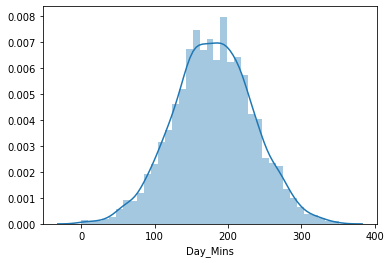

In [45]:

# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()

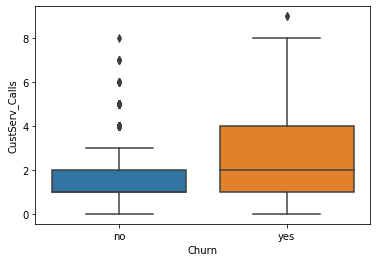

In [46]:
# Create the box plot
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = telco)

# Display the plot
plt.show()

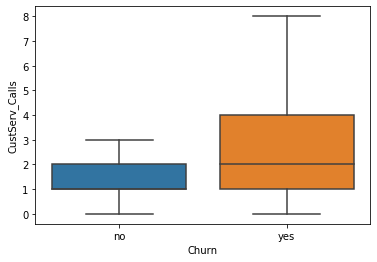

In [47]:
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "")

# Display the plot
plt.show()

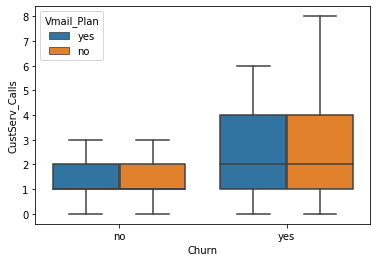

In [48]:

# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

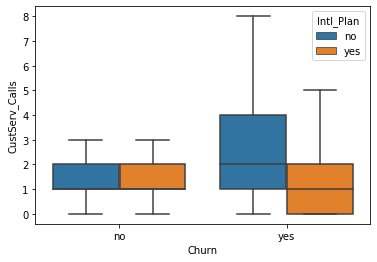

In [49]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

In [50]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'yes':1,'no':0})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'yes':1,'no':0})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'yes':1,'no':0})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [51]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco.State)

In [53]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

KeyError: "None of [Index(['Area_Code', 'Phone'], dtype='object')] are in the [columns]"

In [54]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'State'
telco = pd.get_dummies(telco)

# Print the head of telco_state
print(telco.head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls  Churn  Intl_Plan  Vmail_Plan  ...  State_SD  State_TN  \
0               1      0          0           1  ...         0         0   
1               1      0          0           1  ...         0         0   
2               0      0          0           0  ...         0         0   
3               2      0          1           0  ...         0         0   
4               3      0          1           0  ...         0         0   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State

In [55]:
telco.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Intl_Plan         3333 non-null int64
Vmail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State_AK          3333 non-null uint8
State_AL          3333 non-null uint8
State_AR          3333 non-null uint8
State_AZ          3333 non-null uint8
State_CA          3333 non-null uint8
Sta

In [57]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco)


C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [61]:
# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=telco.columns)

# Print summary statistics
print(telco_scaled_df.describe())

       Account_Length  Vmail_Message      Day_Mins      Eve_Mins  \
count    3.333000e+03   3.333000e+03  3.333000e+03  3.333000e+03   
mean     1.713134e-16   3.832651e-16  7.081711e-16 -1.067919e-16   
std      1.000150e+00   1.000150e+00  1.000150e+00  1.000150e+00   
min     -2.513172e+00  -5.917599e-01 -3.301096e+00 -3.963622e+00   
25%     -6.797448e-01  -5.917599e-01 -6.624241e-01 -6.780300e-01   
50%     -1.627644e-03  -5.917599e-01 -6.887677e-03  8.276141e-03   
75%      6.513740e-01   8.695542e-01  6.725198e-01  6.768330e-01   
max      3.564766e+00   3.134591e+00  3.140422e+00  3.209066e+00   

         Night_Mins     Intl_Mins  CustServ_Calls         Churn     Intl_Plan  \
count  3.333000e+03  3.333000e+03    3.333000e+03  3.333000e+03  3.333000e+03   
mean   6.602046e-17 -3.274375e-16    3.275708e-16 -5.176377e-17 -1.021951e-16   
std    1.000150e+00  1.000150e+00    1.000150e+00  1.000150e+00  1.000150e+00   
min   -3.513648e+00 -3.667413e+00   -1.188218e+00 -4.116718e-01

In [66]:
telco_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
Account_Length    3333 non-null float64
Vmail_Message     3333 non-null float64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null float64
Churn             3333 non-null float64
Intl_Plan         3333 non-null float64
Vmail_Plan        3333 non-null float64
Day_Calls         3333 non-null float64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null float64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null float64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null float64
Intl_Charge       3333 non-null float64
State_AK          3333 non-null float64
State_AL          3333 non-null float64
State_AR          3333 non-null float64
State_AZ          3333 non-null float64
State_CA     

In [67]:
# Create the new feature
telco_scaled_df['Avg_Night_Calls'] = telco_scaled_df.Night_Mins/telco_scaled_df.Night_Calls

# Print the first five rows of 'Avg_Night_Calls'
print(telco_scaled_df['Avg_Night_Calls'].head())

0   -1.861984
1    7.160988
2   -3.804613
3    0.138364
4   -0.258766
Name: Avg_Night_Calls, dtype: float64


In [69]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [89]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf=DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features],telco['Churn'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.93


C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [94]:
y_pred=clf.predict(X_test)

In [95]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[845   8]
 [ 62  85]]


In [96]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import precision_score

# Print the recall
print(precision_score(y_test, y_pred))

C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0


In [97]:

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.45454545454545453


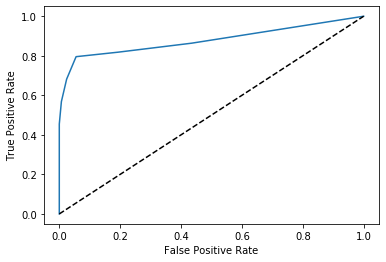

In [98]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [99]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8784482758620691


In [100]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5573770491803279


In [101]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

C:\Users\Gaya\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 'auto'}


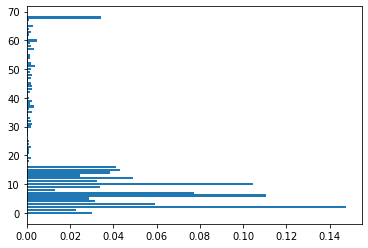

In [102]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

<Figure size 432x288 with 0 Axes>

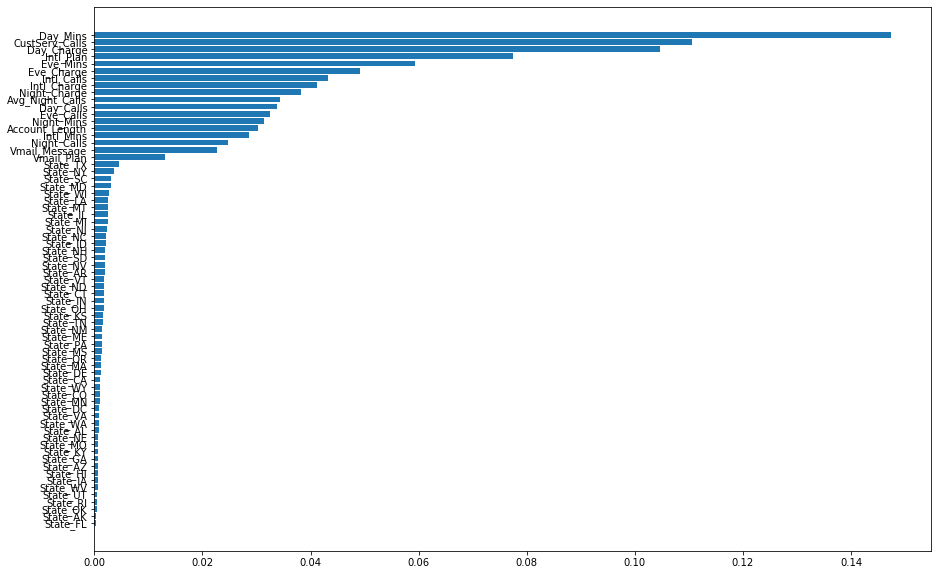

In [107]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.figure(figsize=(15,10))
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()